In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
import cubetools

In [4]:
data, meta =cubetools.read_cube("diff.VT.cube")

In [5]:
meta

{'org': <map at 0x7f6ab46fae80>,
 'xvec': <map at 0x7f6ab46faef0>,
 'yvec': <map at 0x7f6ab46faf60>,
 'zvec': <map at 0x7f6ab46fafd0>,
 'atoms': [(6, <map at 0x7f6ab470a048>),
  (6, <map at 0x7f6ab470a0b8>),
  (6, <map at 0x7f6ab470a128>),
  (6, <map at 0x7f6ab470a198>),
  (7, <map at 0x7f6ab470a208>),
  (9, <map at 0x7f6ab470a278>),
  (6, <map at 0x7f6ab470a2e8>),
  (6, <map at 0x7f6ab470a358>),
  (7, <map at 0x7f6ab470a3c8>),
  (9, <map at 0x7f6ab470a438>),
  (6, <map at 0x7f6ab470a4a8>),
  (6, <map at 0x7f6ab470a518>),
  (6, <map at 0x7f6ab470a5c0>),
  (6, <map at 0x7f6ab470a668>),
  (7, <map at 0x7f6ab470a710>),
  (9, <map at 0x7f6ab470a7b8>),
  (6, <map at 0x7f6ab470a860>),
  (6, <map at 0x7f6ab470a908>),
  (7, <map at 0x7f6ab470a9b0>),
  (9, <map at 0x7f6ab470aa58>),
  (6, <map at 0x7f6ab470ab00>),
  (6, <map at 0x7f6ab470aba8>),
  (6, <map at 0x7f6ab470ac50>),
  (6, <map at 0x7f6ab470acf8>),
  (6, <map at 0x7f6ab470ada0>),
  (6, <map at 0x7f6ab470ae48>),
  (6, <map at 0x7f6ab470

In [17]:
NM_PER_PIXEL = x[0]/10
INM_PER_KX = 10/x[0]/data.shape[1]
INM_PER_KY = 10/y[1]/data.shape[2]

In [ ]:
org=[i for i in meta['org']]

In [ ]:
org

In [7]:
z=[i for i in meta['xvec']]
x=[i for i in meta['yvec']]
y=[i for i in meta['zvec']]

In [ ]:
y

In [8]:
atoms = []
pos = []
for i in range(len(meta['atoms'])):
    pos = [j for j in meta['atoms'][i][1]]
    atoms.append(pos)
atom_pos = np.array(atoms)[:,1:4]

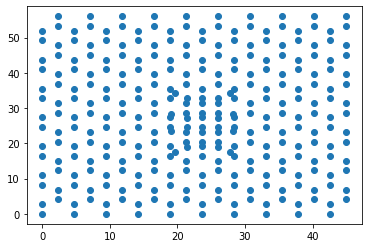

In [9]:
atom_num = range(20)
plt.scatter(atom_pos[:,0],atom_pos[:,1])

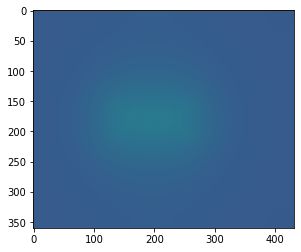

In [11]:
fig, ax = plt.subplots()
ulim = (np.min(data)+np.max(data))/2 + (np.max(data)-np.min(data))*0.5
llim = (np.min(data)+np.max(data))/2 - (np.max(data)-np.min(data))*0.5

ims = []
for i in range(data.shape[0]):
    im = ax.imshow(data[i,:,:], clim=(llim,ulim), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
ani.save("VH.gif", writer = 'imagemagick')
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

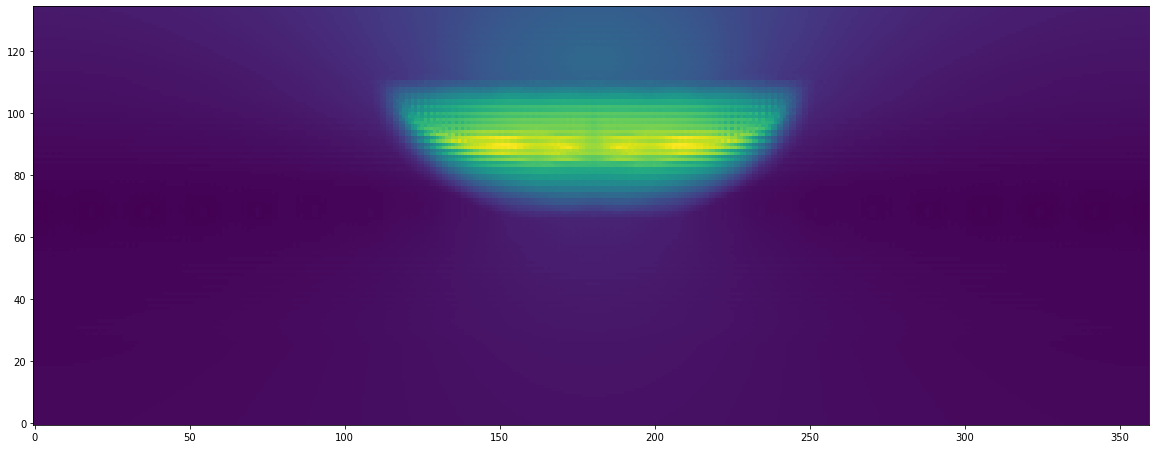

In [12]:
plt.figure(figsize=(20,40))
plt.imshow(np.sum(data,2))
plt.gca().invert_yaxis()

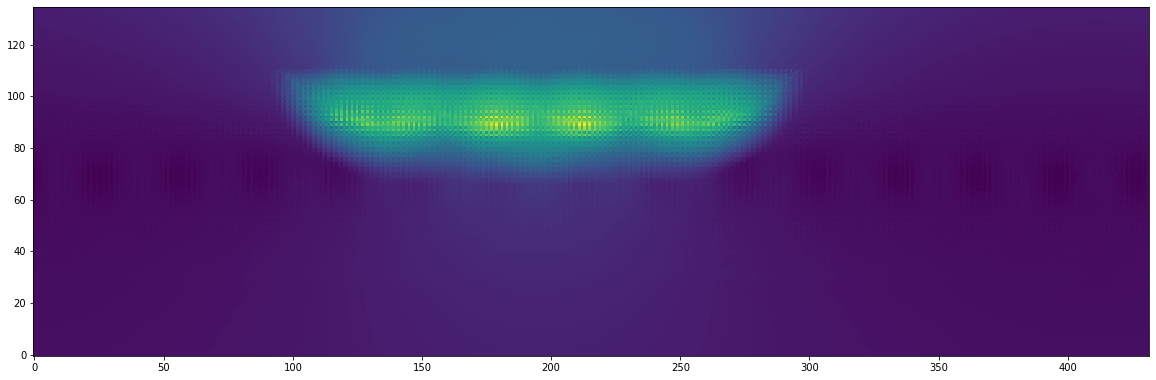

In [13]:
plt.figure(figsize=(20,40))
plt.imshow(np.sum(data,1))
plt.gca().invert_yaxis()

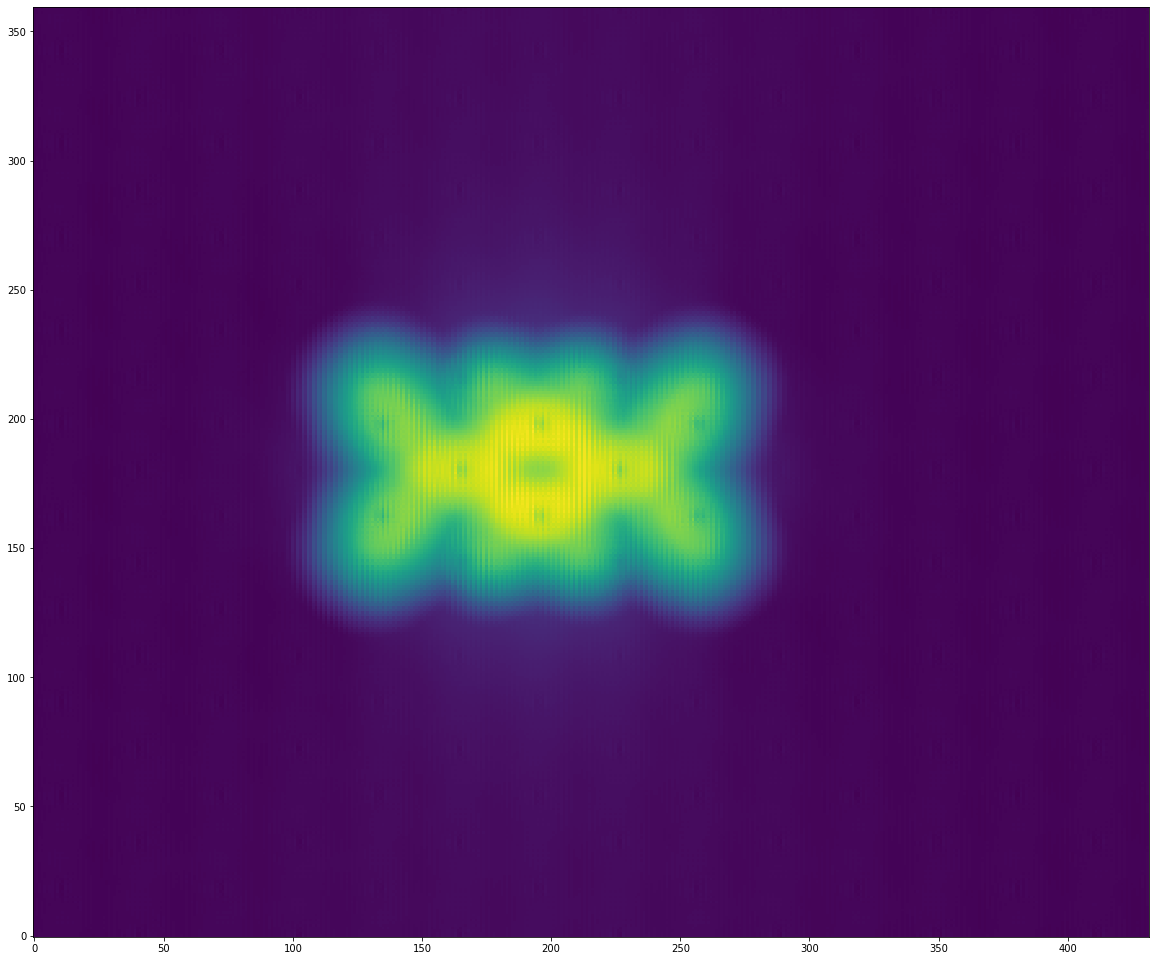

In [14]:
plt.figure(figsize=(20,40))
plt.imshow(np.sum(data[70:90,:,:],0))
plt.gca().invert_yaxis()

/home/a/as/asai/dsgo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


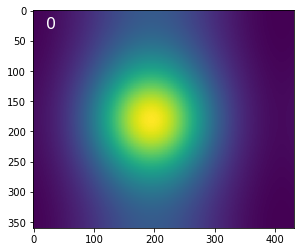

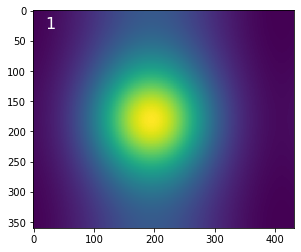

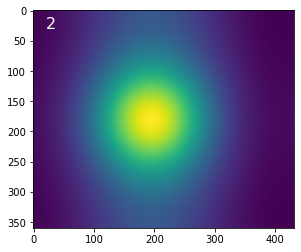

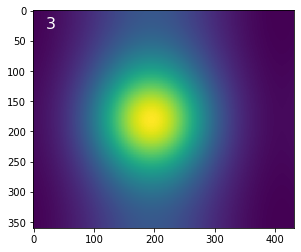

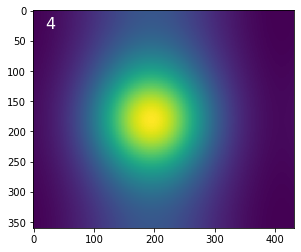

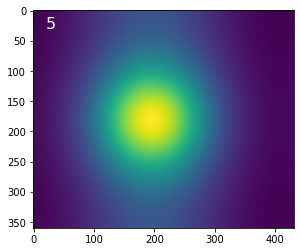

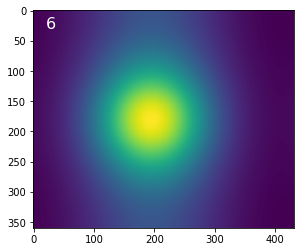

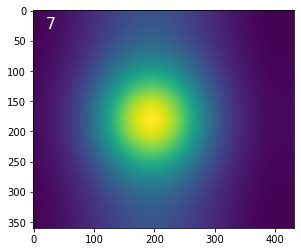

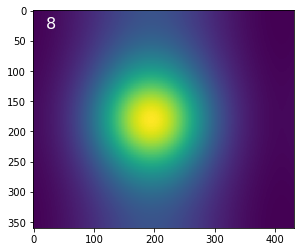

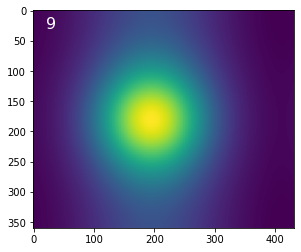

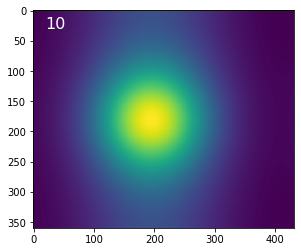

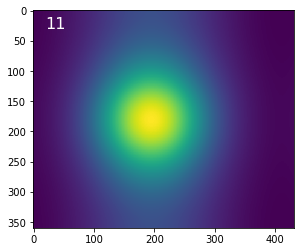

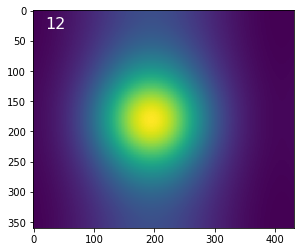

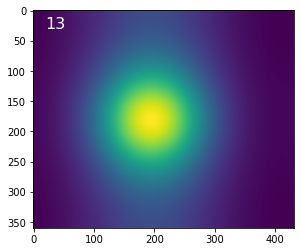

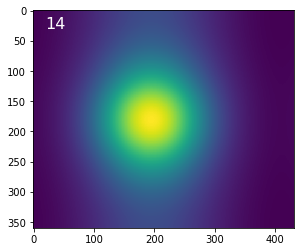

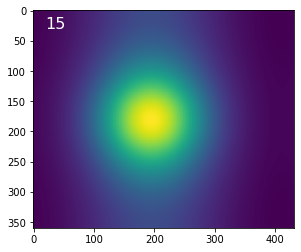

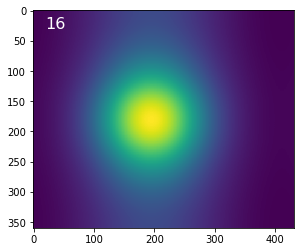

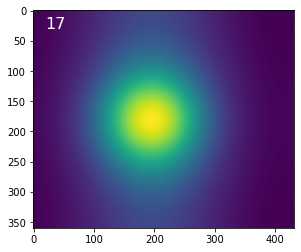

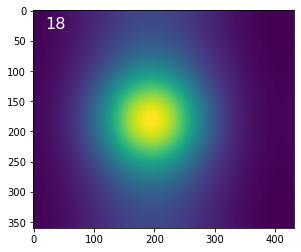

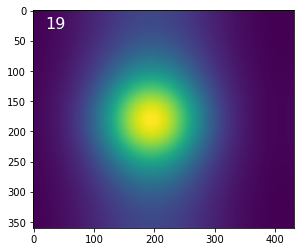

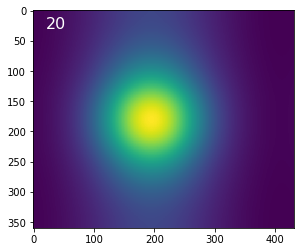

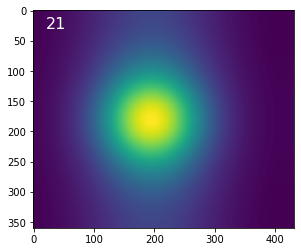

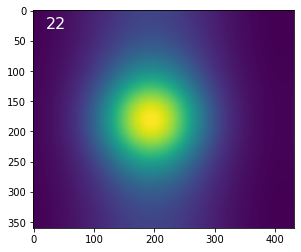

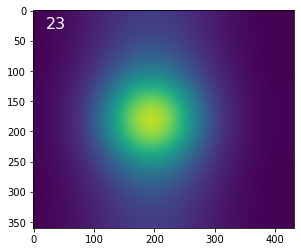

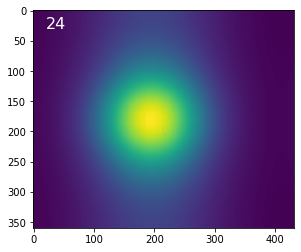

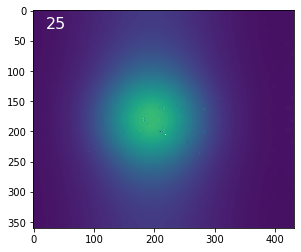

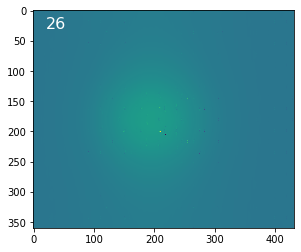

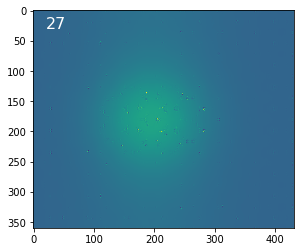

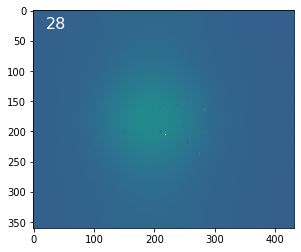

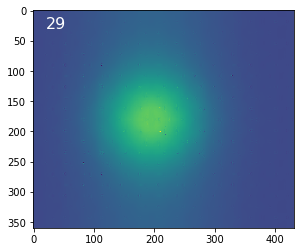

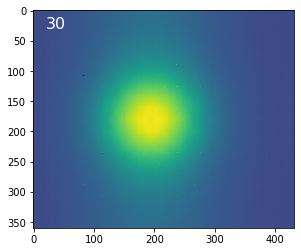

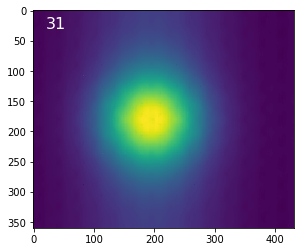

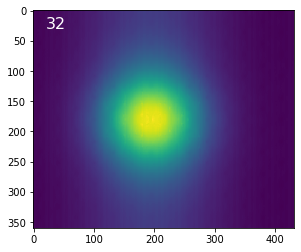

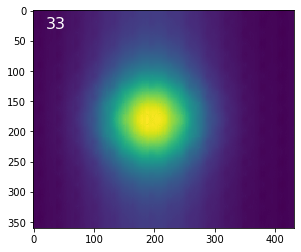

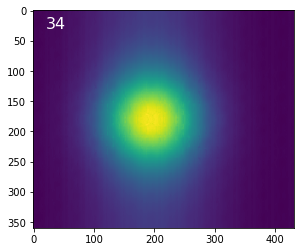

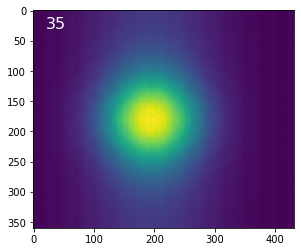

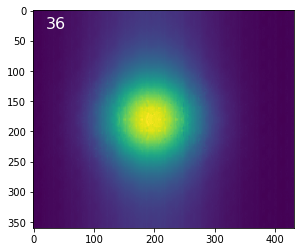

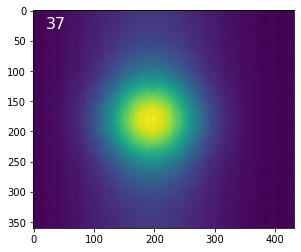

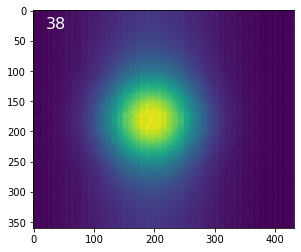

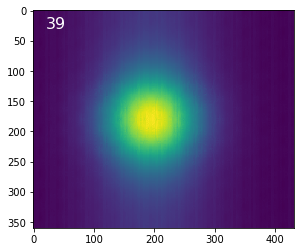

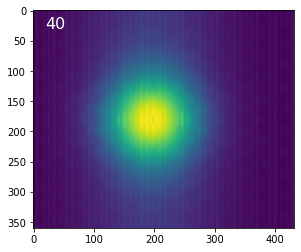

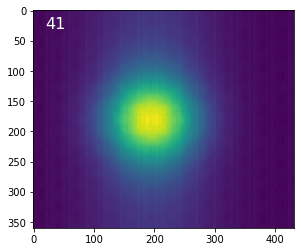

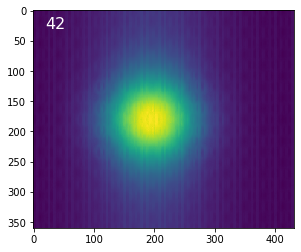

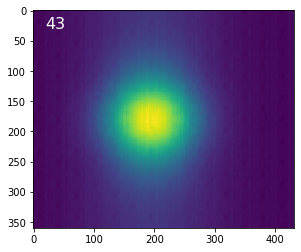

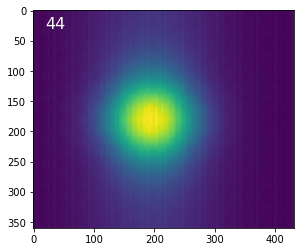

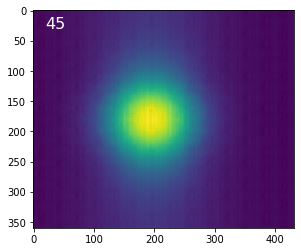

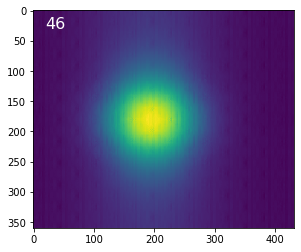

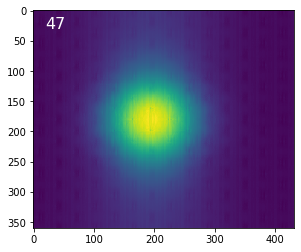

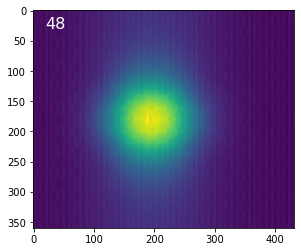

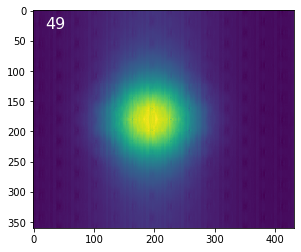

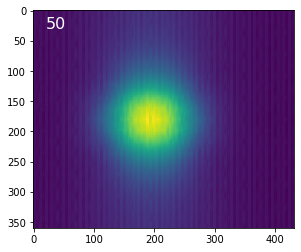

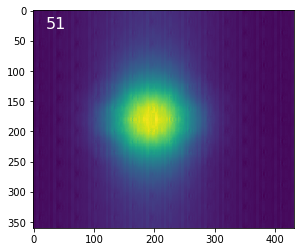

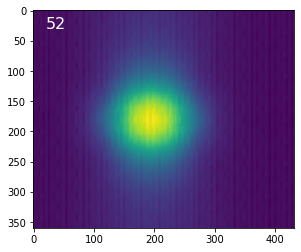

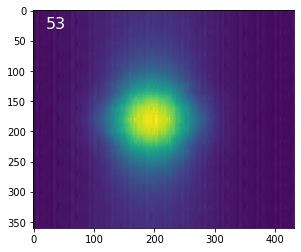

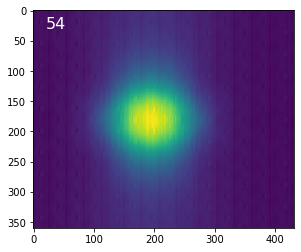

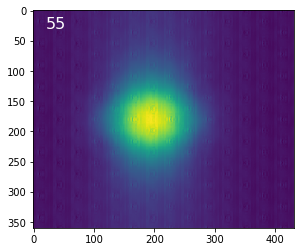

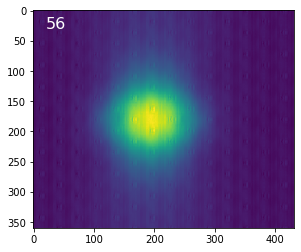

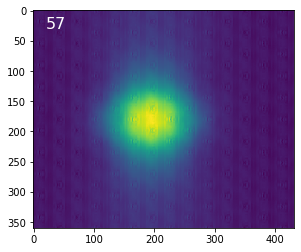

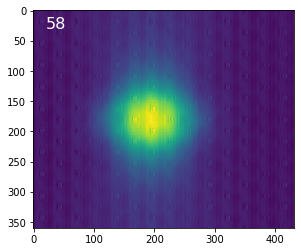

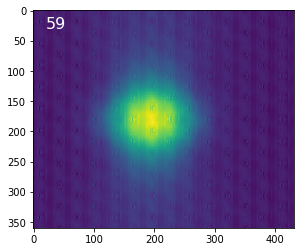

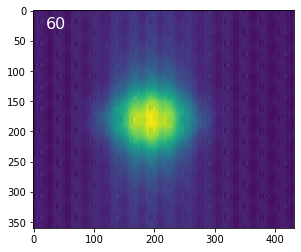

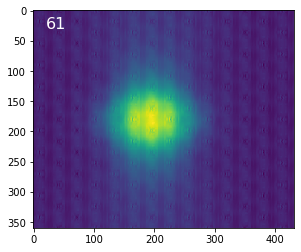

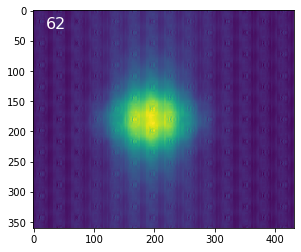

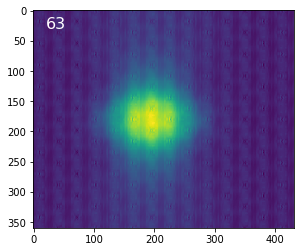

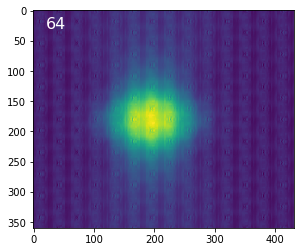

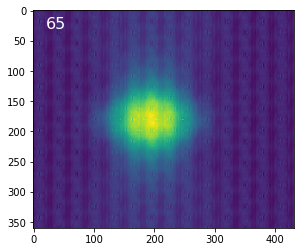

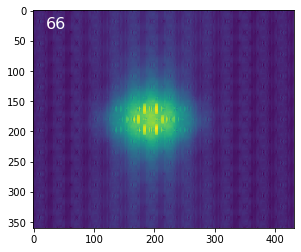

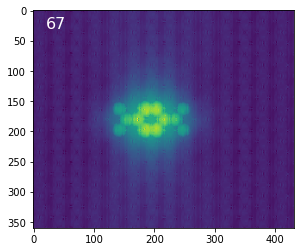

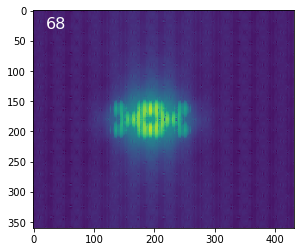

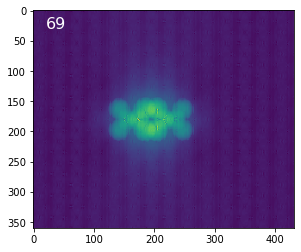

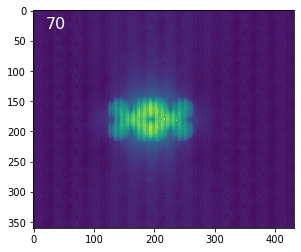

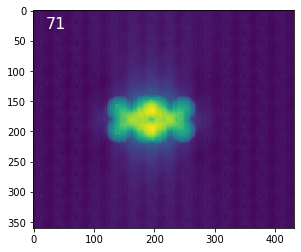

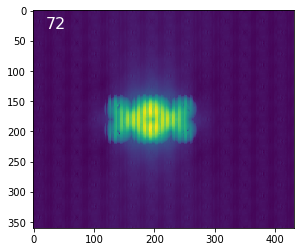

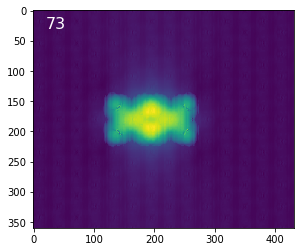

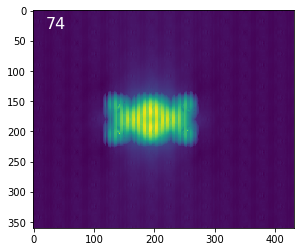

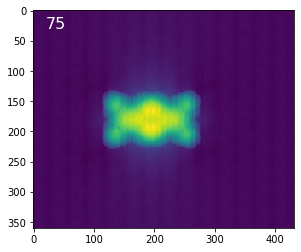

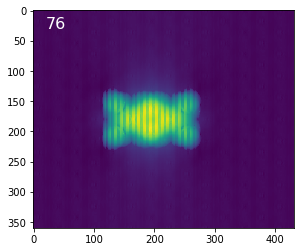

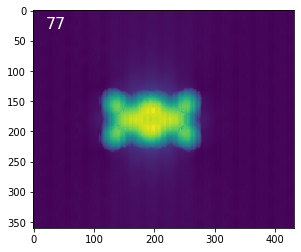

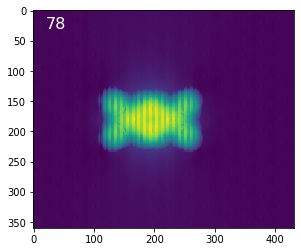

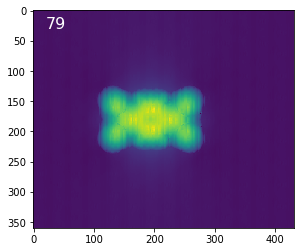

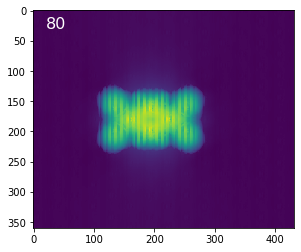

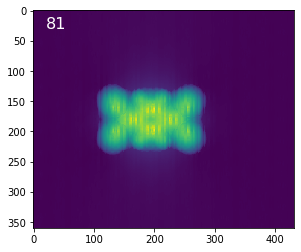

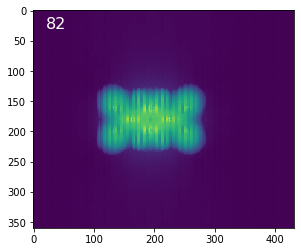

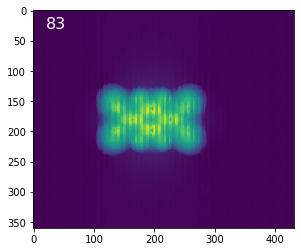

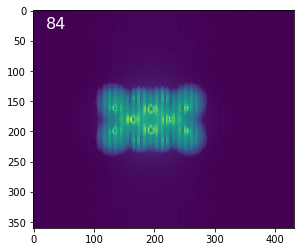

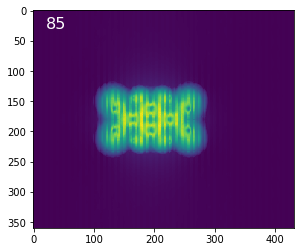

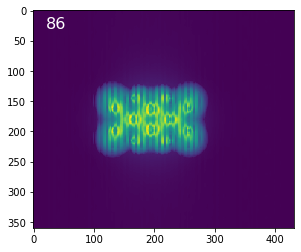

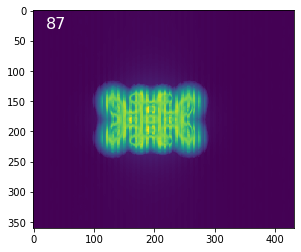

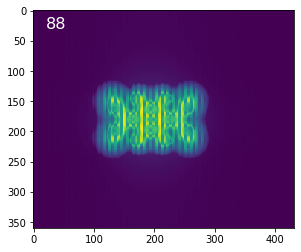

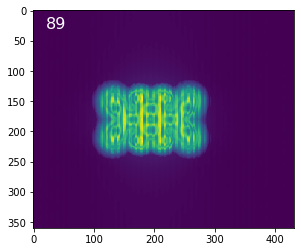

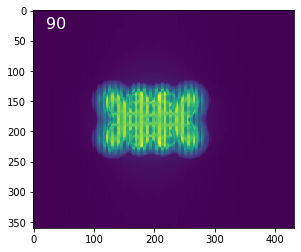

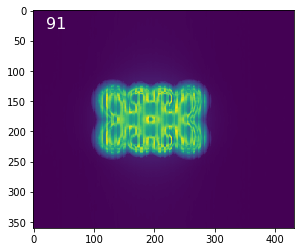

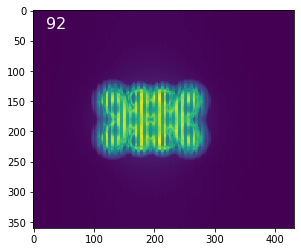

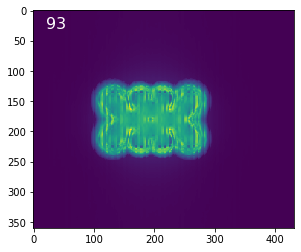

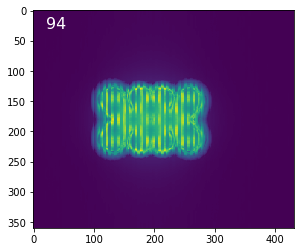

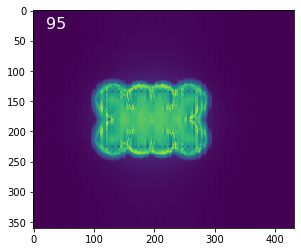

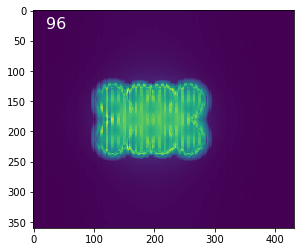

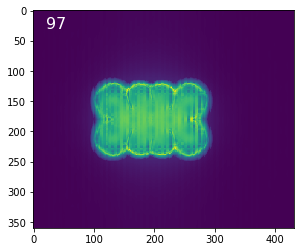

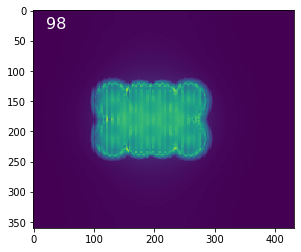

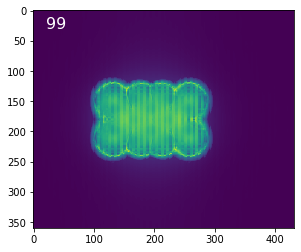

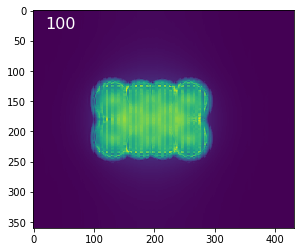

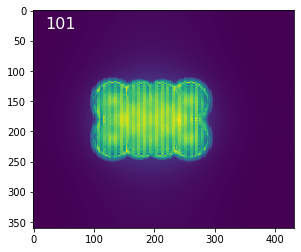

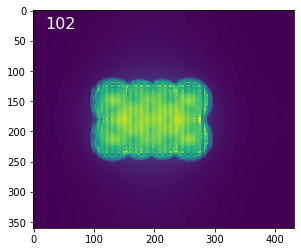

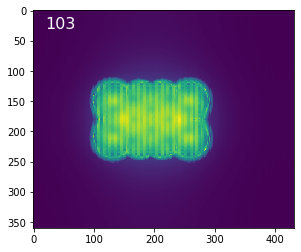

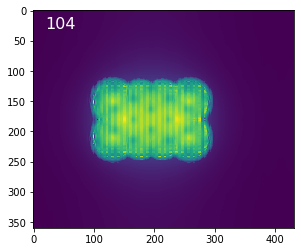

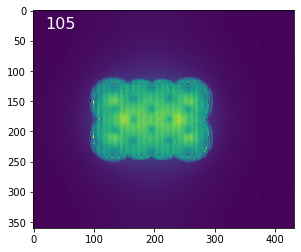

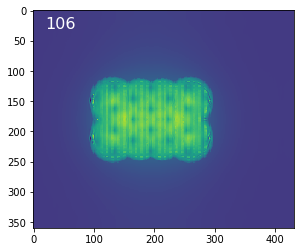

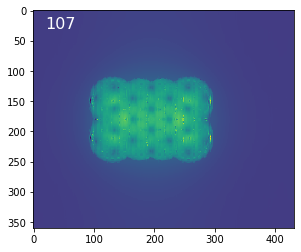

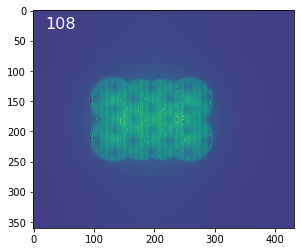

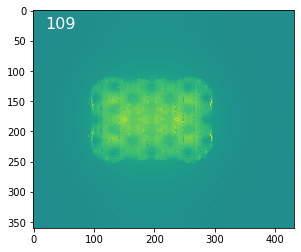

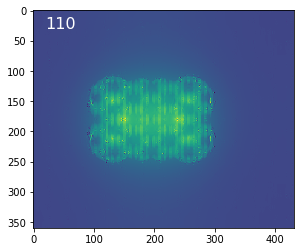

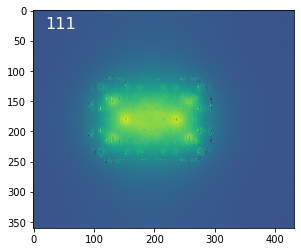

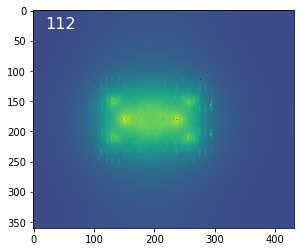

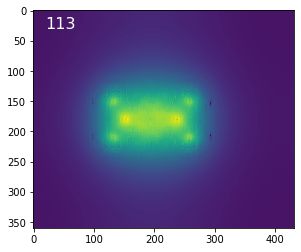

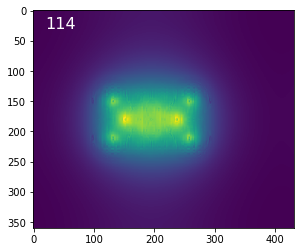

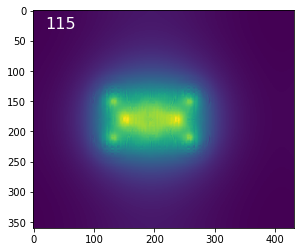

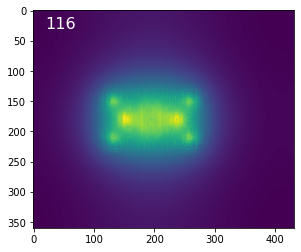

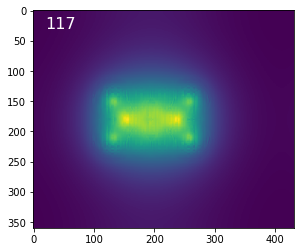

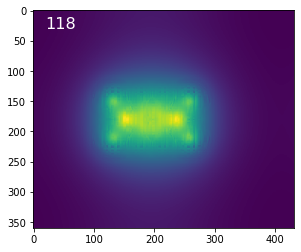

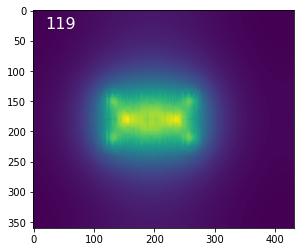

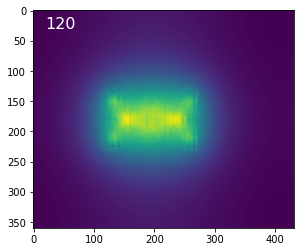

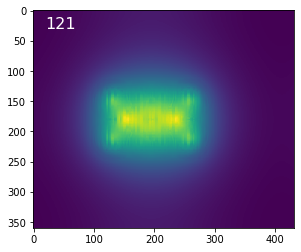

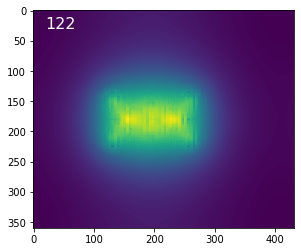

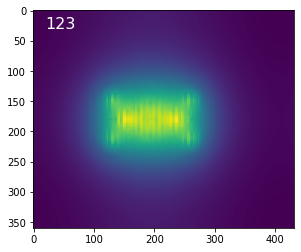

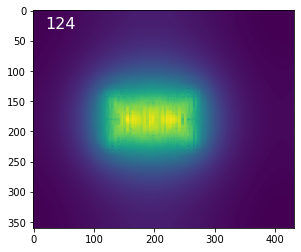

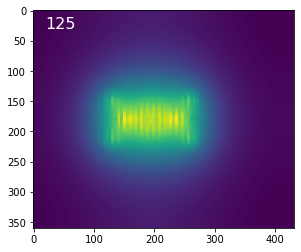

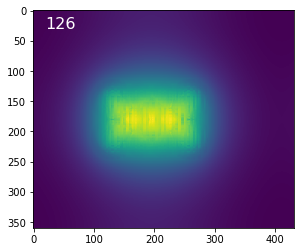

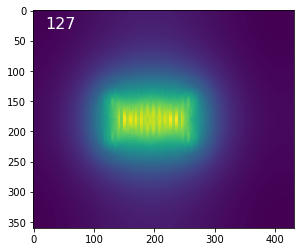

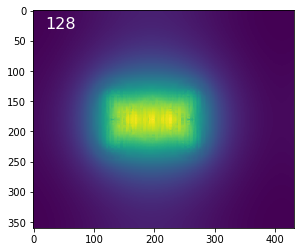

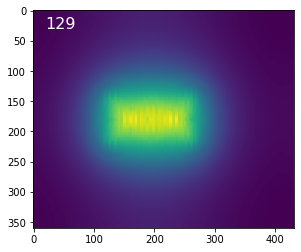

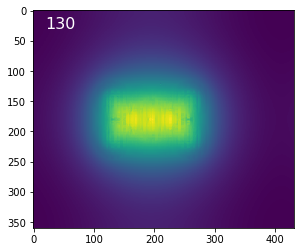

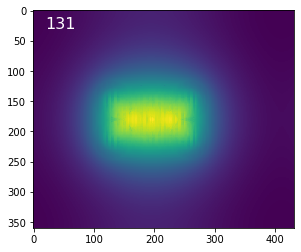

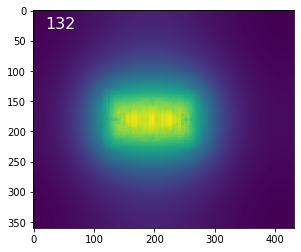

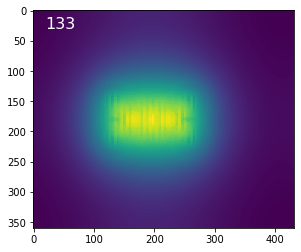

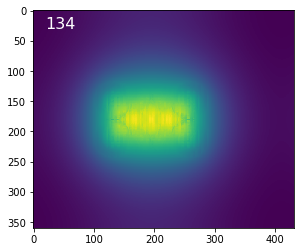

In [15]:
ulim = (np.min(data)+np.max(data))/2 + (np.max(data)-np.min(data))*0.2
llim = (np.min(data)+np.max(data))/2 - (np.max(data)-np.min(data))*0.2
for i in range(data.shape[0]):
    plt.figure()
    plt.imshow(data[i,:,:])
    plt.text(20,30,i,color='white',fontsize=16)

In [18]:
#Compute fft
f=np.fft.fft2(np.sum(data[70:90,:,:],0))#80:135
fshift = np.fft.fftshift(f)
fshift.shape

#Draw FBZ
FBZ=1/0.246/3#/np.sqrt(3)
hex_coords = np.array([[np.sqrt(3)/2,1/2],[0,1],[-np.sqrt(3)/2,1/2],[-np.sqrt(3)/2,-1/2],[0,-1],[np.sqrt(3)/2,-1/2]])
#np.array([[1,0],[1/2,np.sqrt(3)/2],[-1/2,np.sqrt(3)/2],[-1,0],[-1/2,-np.sqrt(3)/2],[1/2,-np.sqrt(3)/2]])
seg = []
scale = np.array([1/INM_PER_KY, 1/INM_PER_KX])*FBZ #np.array([1,1])*12#
shift = [data.shape[2]//2,data.shape[1]//2]
test=itertools.cycle(hex_coords)
counter = 0
current = next(test)
current=np.multiply(current,scale) + shift
for i in range(6):
    next_item = next(test)
    next_item = np.multiply(next_item,scale) + shift
    seg.append([current,next_item])
    current = next_item
seg = np.array(seg)

(151.2, 280.8, 126.0, 234.0)

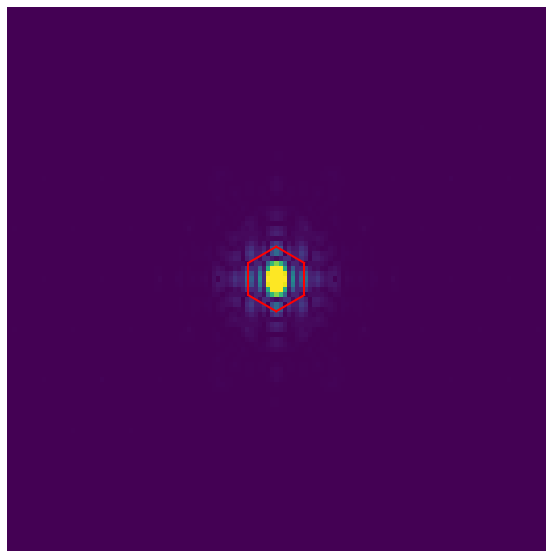

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
ftimage = np.abs(fshift)
ax.imshow(ftimage,clim=(0,20000))
ax.set_aspect(INM_PER_KX/INM_PER_KY)
for i in range(len(seg)):
    ax.plot([seg[i,0,0], seg[i,1,0]],[seg[i,0,1], seg[i,1,1]],color='r',linewidth=2)

zoom = 0.3
yllim = ftimage.shape[0]/2 - ftimage.shape[0]/2*zoom 
yulim = ftimage.shape[0]/2 + ftimage.shape[0]/2*zoom 
xllim = ftimage.shape[1]/2 - ftimage.shape[1]/2*zoom 
xulim = ftimage.shape[1]/2 + ftimage.shape[1]/2*zoom
plt.xlim((xllim, xulim))
plt.ylim((yllim, yulim))
plt.axis('off')

In [ ]:
x,y = np.meshgrid(range(data.shape[1]), range(data.shape[0]))
#x=x*scale[0]
#y=y*scale[1]
mx = data.shape[1]//2
my = data.shape[0]//2
x00, y00 = 6, 5
x0, y0 =  mx+x00, my-y00
x1, y1 = mx-x00, my+y00
x2, y2 =  mx+x00, my+y00
x3, y3 = mx-x00, my-y00
r = 3
mask = ((x-x0)**2 + (y-y0)**2 < r**2) + ((x-x1)**2 + (y-y1)**2 < r**2) + ((x-x2)**2 + (y-y2)**2 < r**2) + ((x-x3)**2 + (y-y3)**2 < r**2)
fig, ax = plt.subplots(figsize=[10,10])
plt.imshow(mask)
plt.gca().set_aspect(INM_PER_KX/INM_PER_KY)
for i in range(len(seg)):
    ax.plot([seg[i,0,0], seg[i,1,0]],[seg[i,0,1], seg[i,1,1]],color='r')

In [ ]:
np.multiply(mask,fshift)

In [ ]:
iffft = np.fft.ifft2(np.fft.ifftshift(fshift*mask)).real
iffft = -iffft
fig, ax = plt.subplots(figsize=[10,10])
ax.imshow(iffft, origin = 'lower', cmap = 'seismic')